In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Python/Datasets/Life Expectancy Data.csv")
df.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [3]:
print(df.shape)
print(df.info())

(2938, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio    

In [4]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


**Handling Missing Values**

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean',
fill_value=None)
for cols in df.columns:
    if df[cols].isnull().sum()>0:
        df[cols] = imputer.fit_transform(df[[cols]])

**EDA**

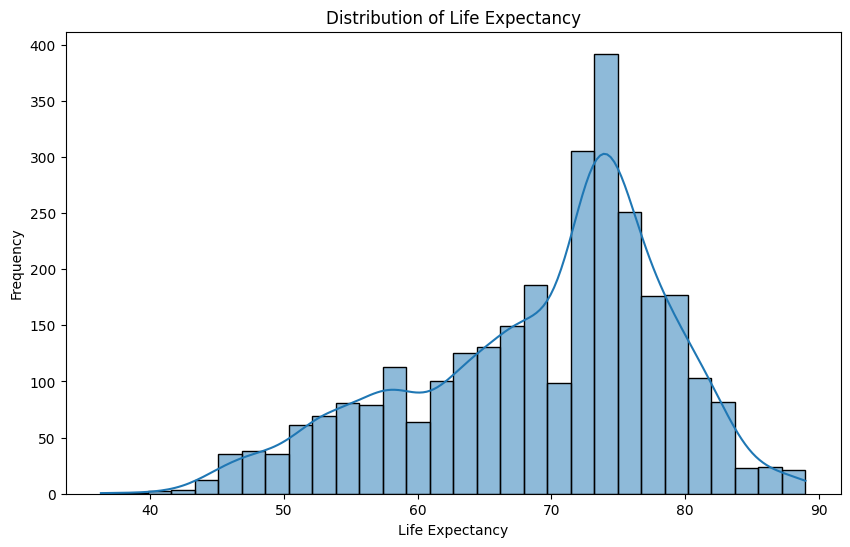

In [7]:
# Distribution of life expectancy
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy '], bins=30, kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

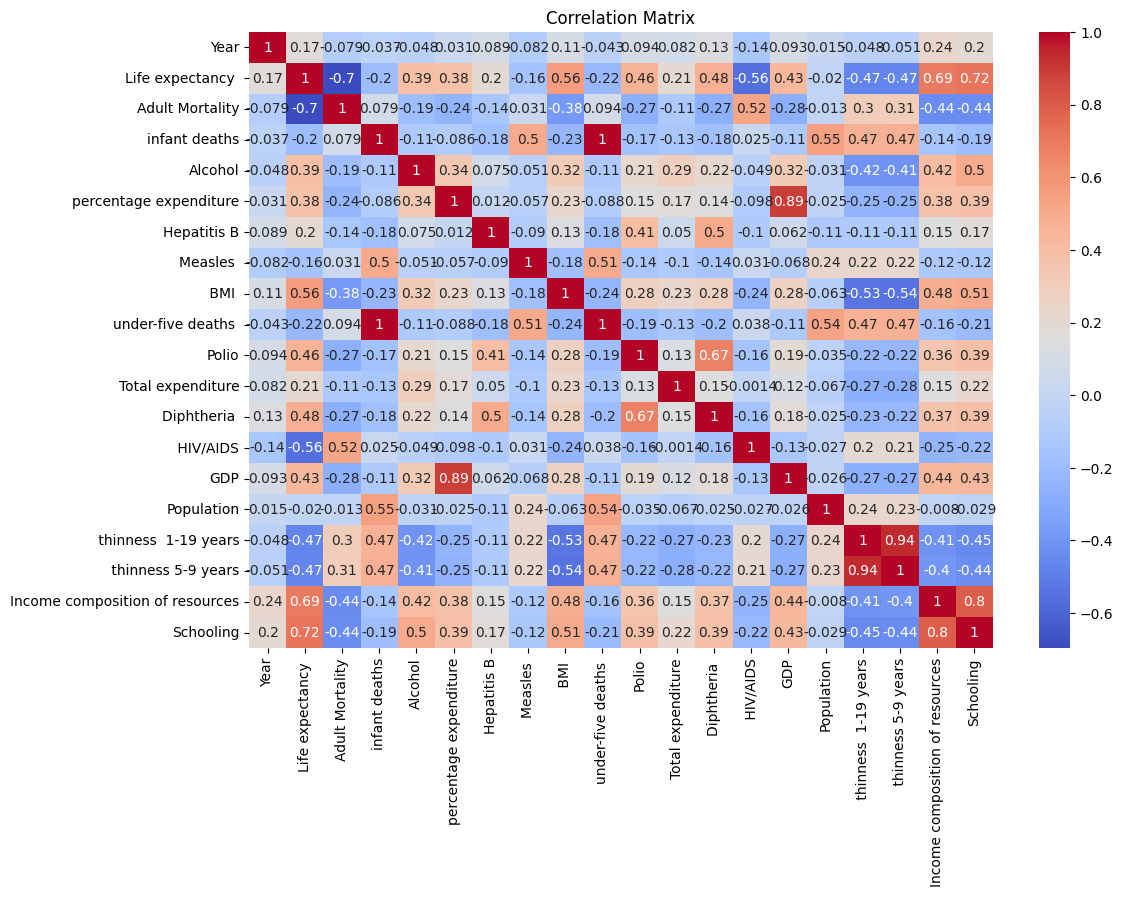

In [8]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

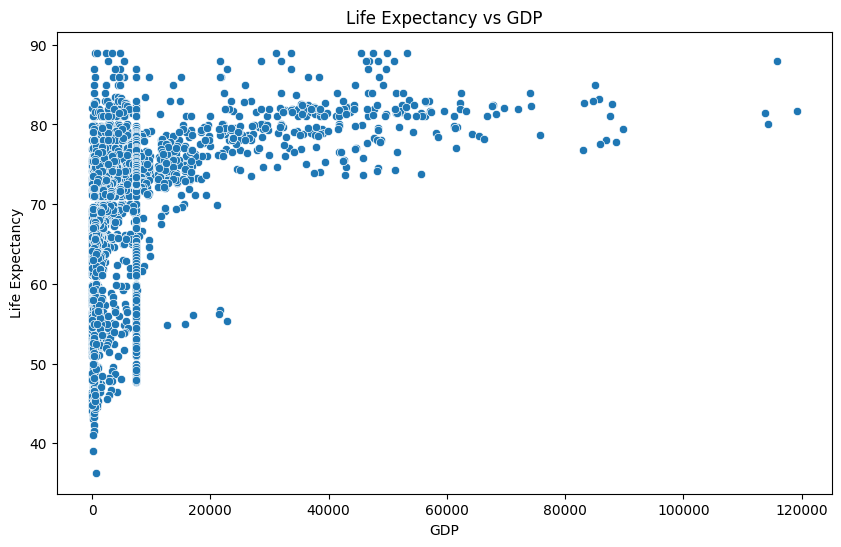

In [9]:
# Relationship between Life Expectancy and GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life expectancy ', data=df)
plt.title('Life Expectancy vs GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

In [10]:
from scipy.stats import pearsonr
# Statistical Analysis
# Correlation between life expectancy and key indicators
gdp_corr, _ = pearsonr(df['GDP'], df['Life expectancy '])
print(f'Correlation between GDP and Life Expectancy: {gdp_corr:.2f}')

Correlation between GDP and Life Expectancy: 0.43


In [11]:
# Regression Analysis
import statsmodels.api as sm

In [12]:
# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Find pairs of features with correlation > 0.5 or < -0.5
threshold = 0.5
filtered_features = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]

# Remove self-correlations (correlation of a feature with itself)
filtered_features = filtered_features.where(filtered_features != 1.0)

# Display the filtered correlation matrix
print(filtered_features)

                                 Year  Life expectancy   Adult Mortality  \
Year                              NaN               NaN              NaN   
Life expectancy                   NaN               NaN        -0.696359   
Adult Mortality                   NaN         -0.696359              NaN   
infant deaths                     NaN               NaN              NaN   
Alcohol                           NaN               NaN              NaN   
percentage expenditure            NaN               NaN              NaN   
Hepatitis B                       NaN               NaN              NaN   
Measles                           NaN               NaN              NaN   
 BMI                              NaN          0.559255              NaN   
under-five deaths                 NaN               NaN              NaN   
Polio                             NaN               NaN              NaN   
Total expenditure                 NaN               NaN              NaN   
Diphtheria  

In [13]:
# list of feature pairs with high correlation
high_correlation_pairs = [
    (col1, col2, correlation_matrix.loc[col1, col2])
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if (col1 != col2) and (abs(correlation_matrix.loc[col1, col2]) > threshold)
]

print("Highly correlated feature pairs:")
for pair in high_correlation_pairs:
    print(pair)

Highly correlated feature pairs:
('Life expectancy ', 'Adult Mortality', -0.6963593137699748)
('Life expectancy ', ' BMI ', 0.5592553046406479)
('Life expectancy ', ' HIV/AIDS', -0.5564568165997131)
('Life expectancy ', 'Income composition of resources', 0.6924828049608575)
('Life expectancy ', 'Schooling', 0.7150663398620047)
('Adult Mortality', 'Life expectancy ', -0.6963593137699748)
('Adult Mortality', ' HIV/AIDS', 0.5237269198146711)
('infant deaths', 'Measles ', 0.5011283418160044)
('infant deaths', 'under-five deaths ', 0.996628882039801)
('infant deaths', 'Population', 0.5485216693417864)
('percentage expenditure', 'GDP', 0.888140319304608)
('Measles ', 'infant deaths', 0.5011283418160044)
('Measles ', 'under-five deaths ', 0.5078087068586805)
(' BMI ', 'Life expectancy ', 0.5592553046406479)
(' BMI ', ' thinness  1-19 years', -0.5320247499616293)
(' BMI ', ' thinness 5-9 years', -0.5389105726503013)
(' BMI ', 'Schooling', 0.5081054772767056)
('under-five deaths ', 'infant deat

In [14]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Handle missing values by imputing with median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Outlier removal using the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each numerical column
for col in numerical_columns:
    df = remove_outliers_iqr(df, col)

# Summary after outlier removal
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,7.880000e+02,788.000000,788.000000,788.000000,788.000000
mean,2008.213198,74.247430,116.809106,2.007614,5.862495,248.318151,92.521859,18.895939,48.019697,2.379442,94.811041,6.106749,94.799046,0.117640,4576.570035,6.084764e+06,2.716548,2.689302,0.736670,13.614354
std,4.590220,4.368852,67.527507,3.286017,4.078996,310.711974,6.856470,46.784991,17.197047,3.888135,4.911913,1.972408,4.455132,0.050219,3705.642013,5.887455e+06,1.719842,1.708109,0.084397,1.756952
min,2000.000000,62.200000,1.000000,0.000000,0.010000,0.000000,61.000000,0.000000,3.000000,0.000000,71.000000,1.120000,81.000000,0.100000,12.277330,1.230000e+02,0.100000,0.100000,0.479000,8.800000
25%,2004.000000,72.100000,71.000000,0.000000,2.405000,0.000000,88.000000,0.000000,45.000000,0.000000,93.000000,5.100000,93.000000,0.100000,1452.451978,3.745862e+05,1.500000,1.400000,0.681000,12.300000
50%,2009.000000,74.200000,124.000000,1.000000,5.140000,127.389340,95.000000,0.000000,53.650000,1.000000,96.000000,6.100000,96.000000,0.100000,3919.921332,3.909572e+06,2.200000,2.300000,0.739000,13.400000
75%,2012.000000,76.700000,164.199112,2.000000,9.420000,384.238706,98.000000,12.000000,58.425000,3.000000,98.000000,7.402500,98.000000,0.100000,7483.158469,1.275338e+07,3.700000,3.700000,0.792250,14.800000
max,2015.000000,89.000000,295.000000,18.000000,17.310000,1380.228095,99.000000,314.000000,87.300000,21.000000,99.000000,11.150000,99.000000,0.300000,16627.364330,2.975999e+07,7.100000,7.100000,0.948000,18.600000


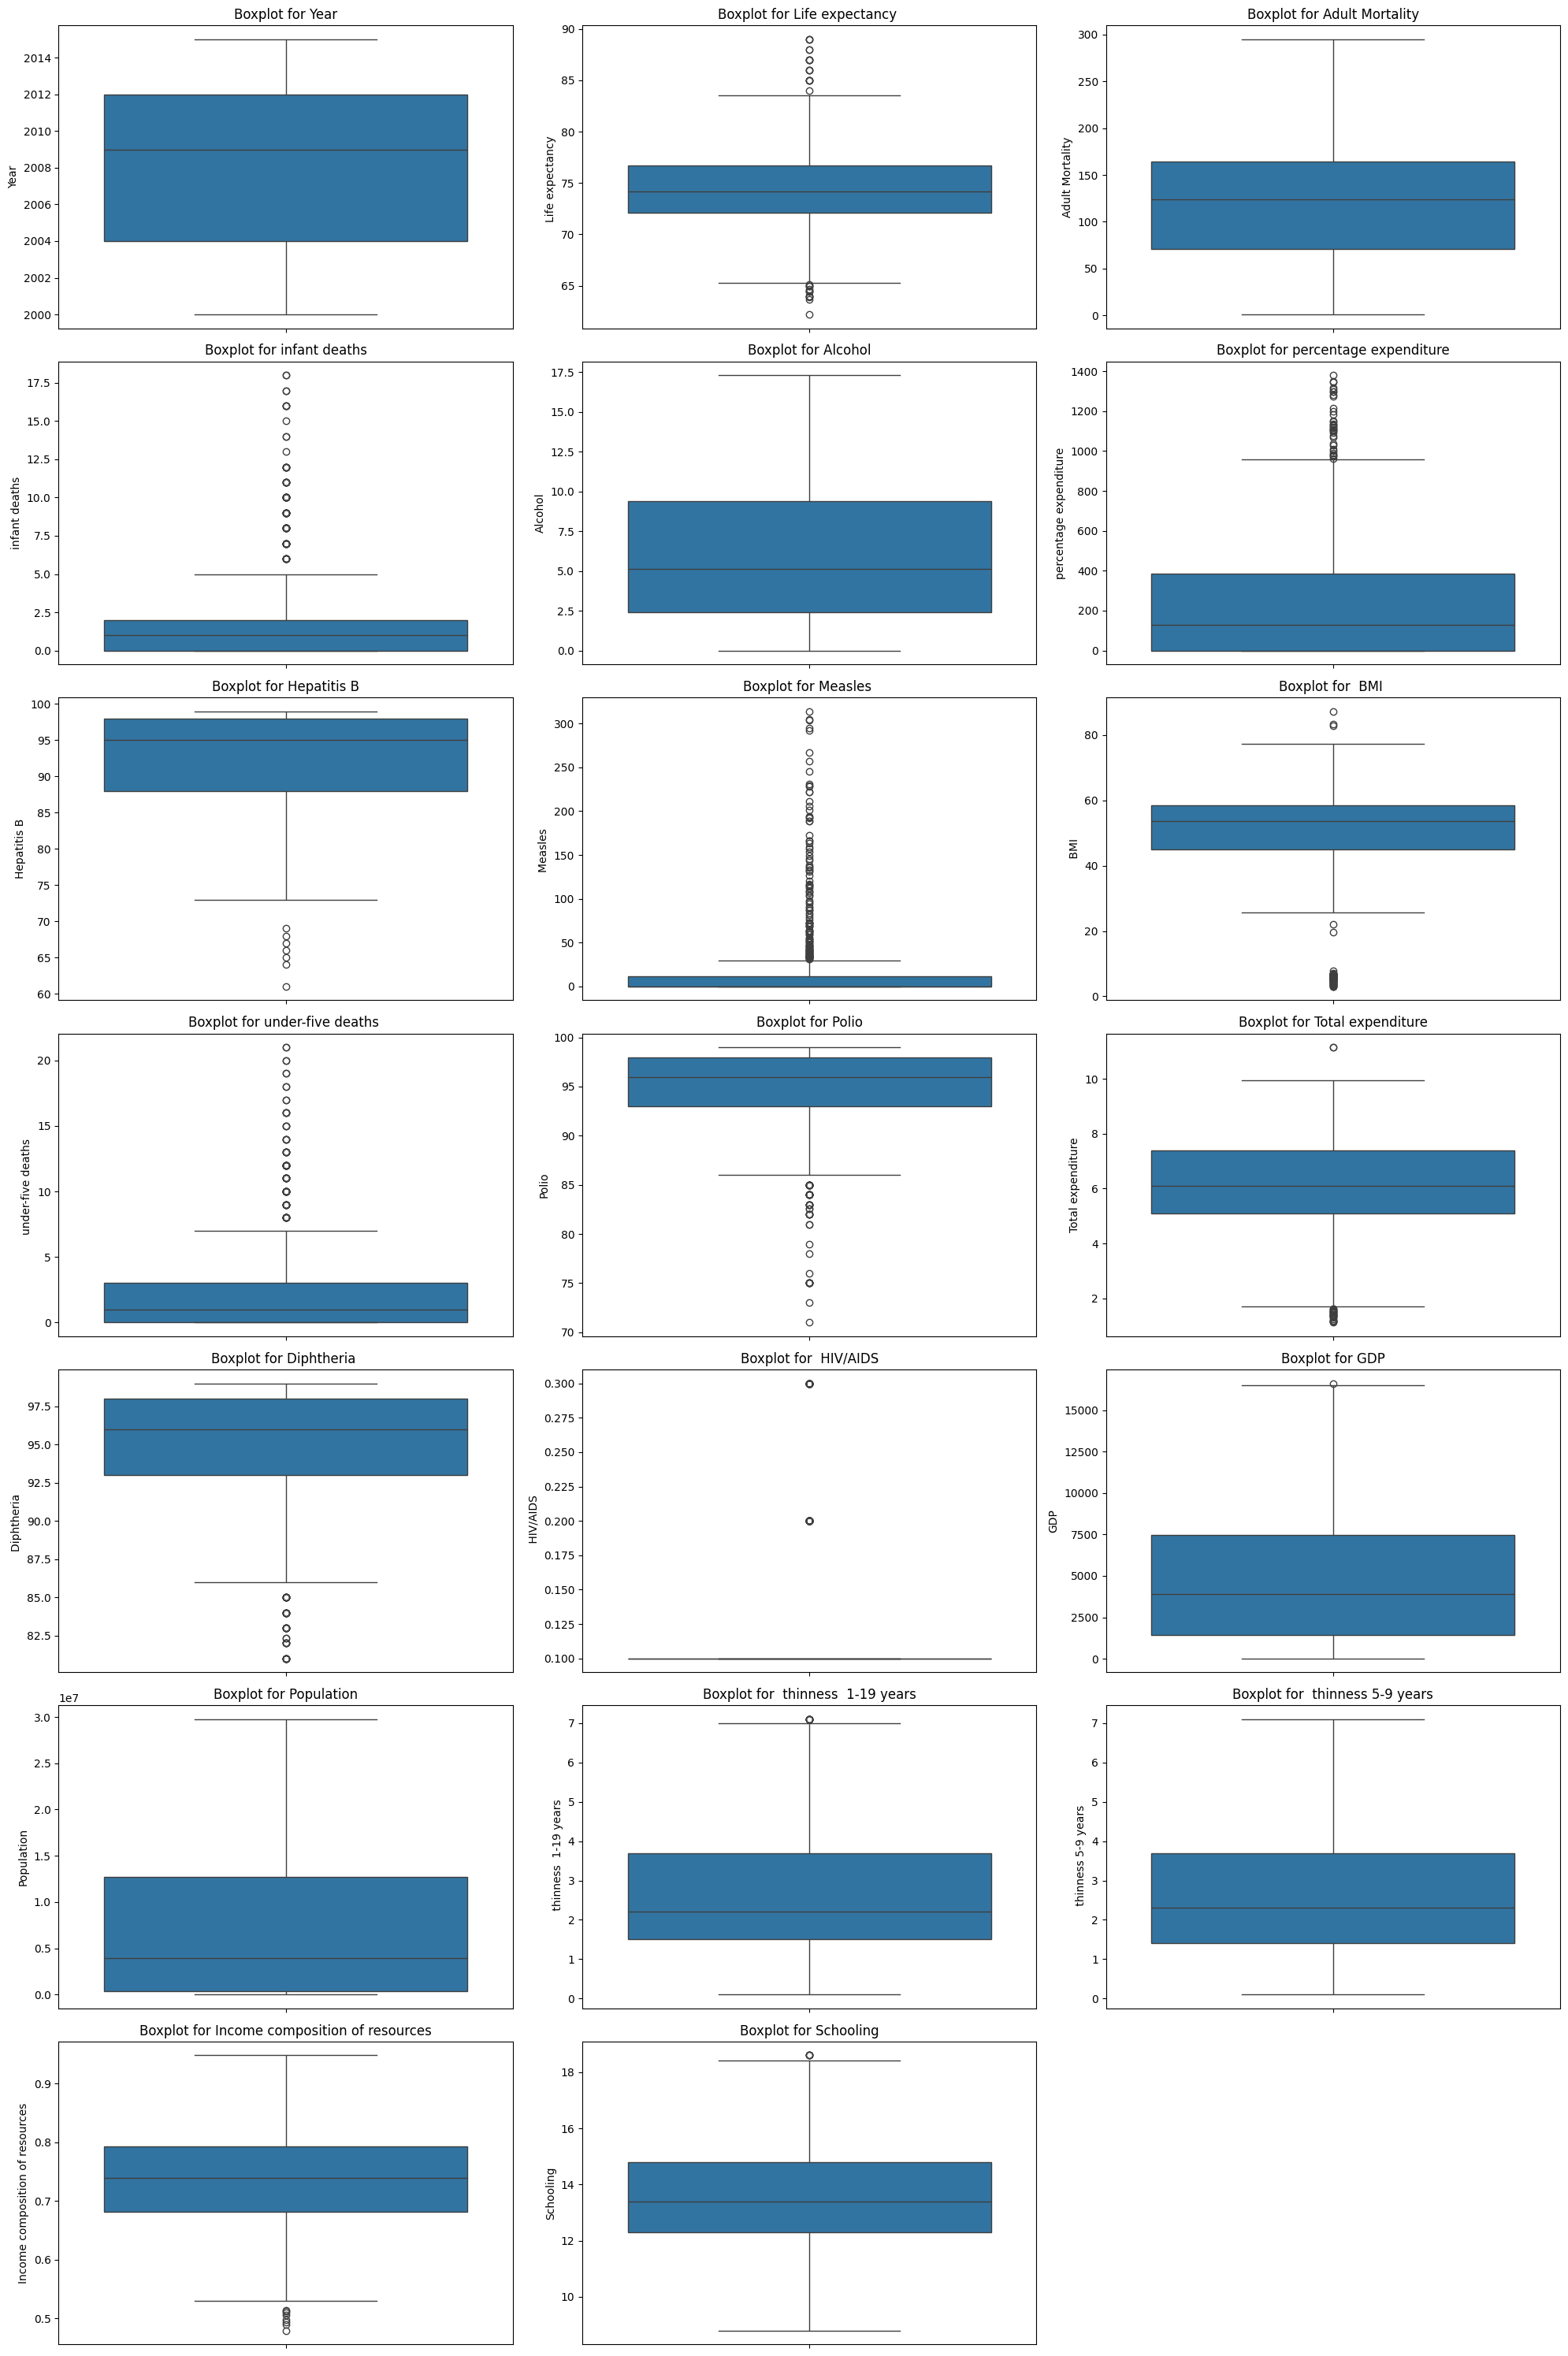

In [15]:
# Generate boxplots for each numerical column
plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()

plt.show()


Numerical Feature Distributions:


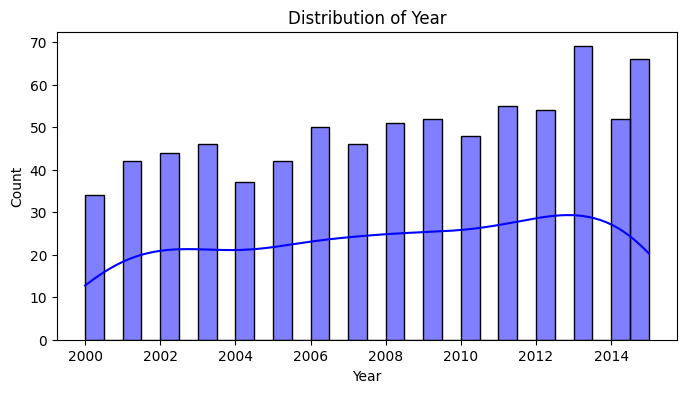

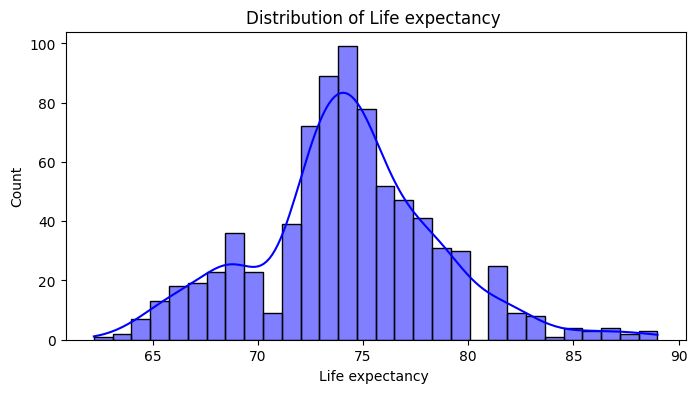

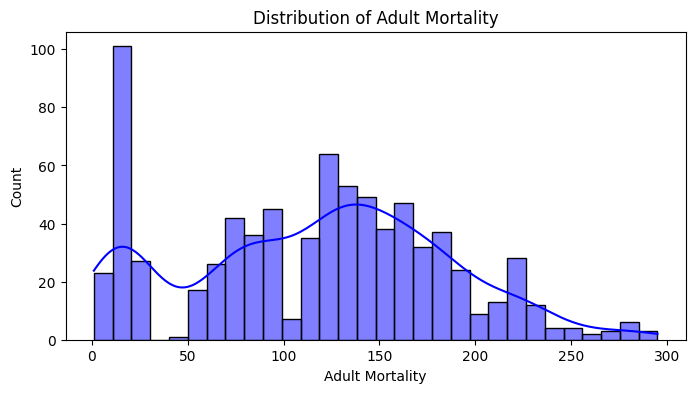

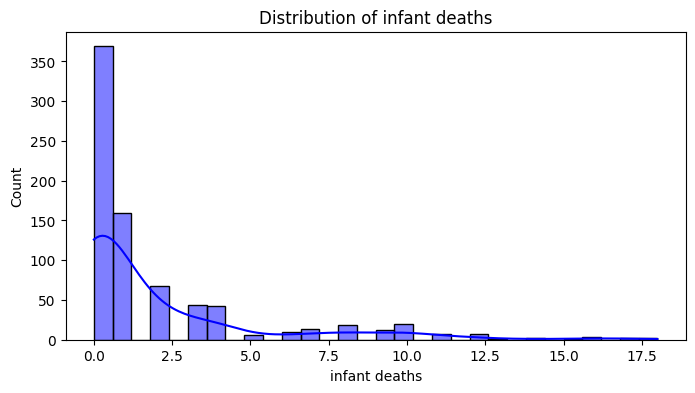

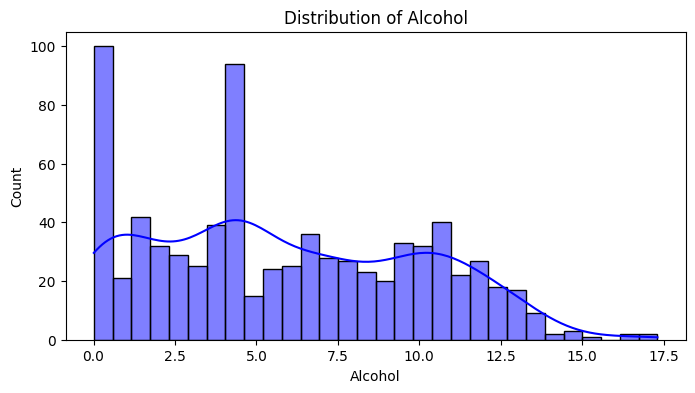

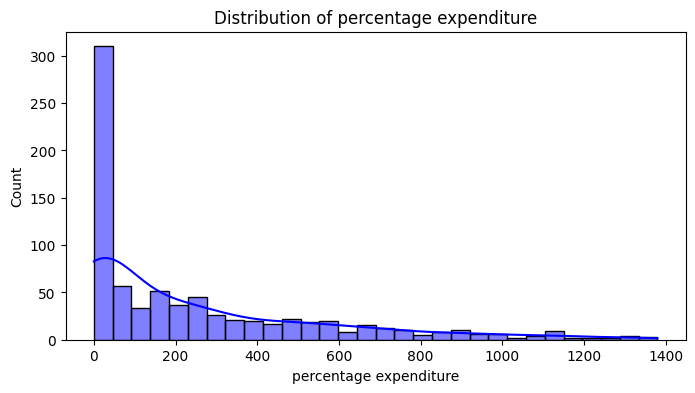

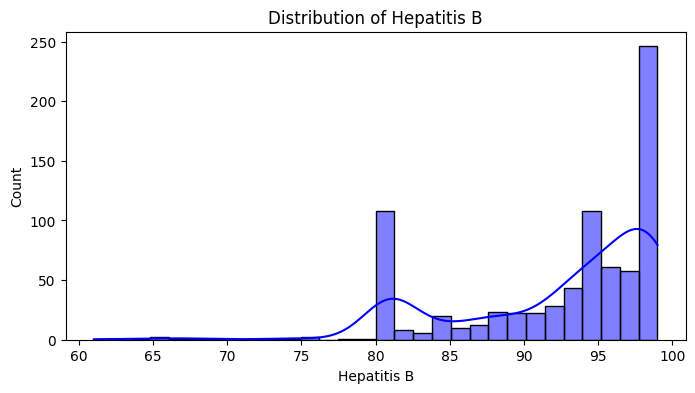

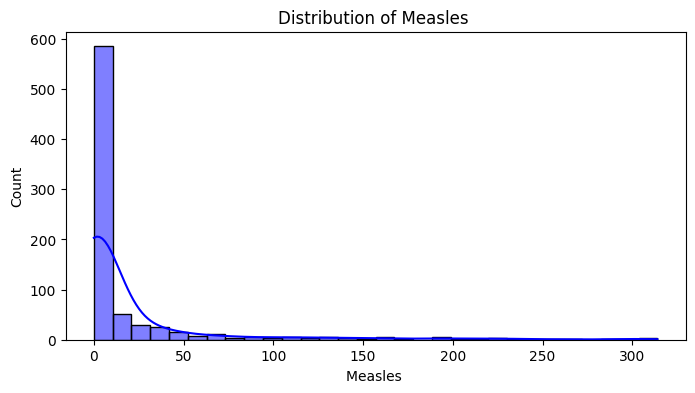

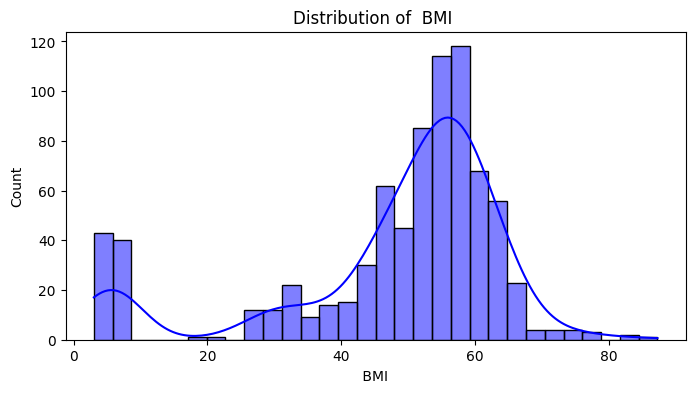

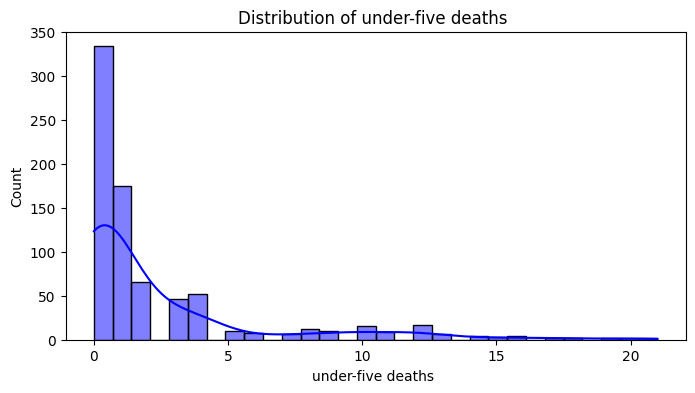

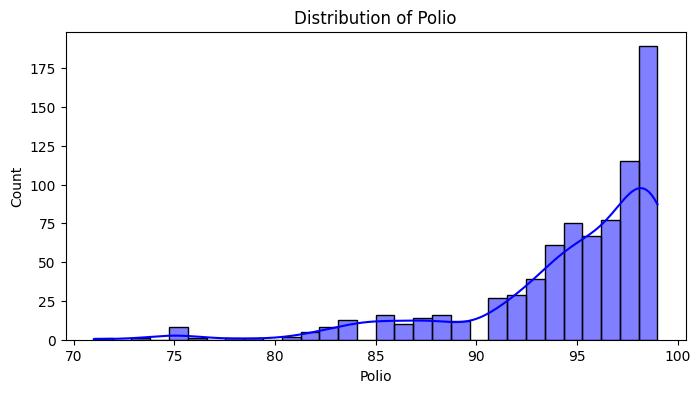

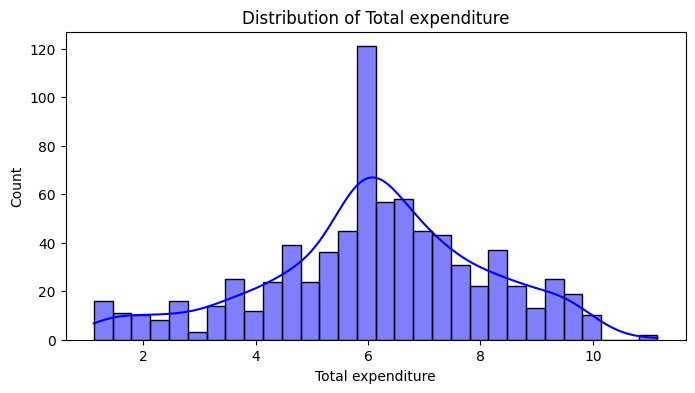

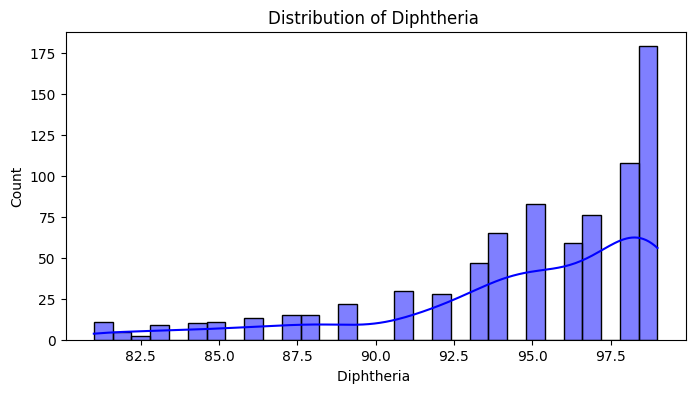

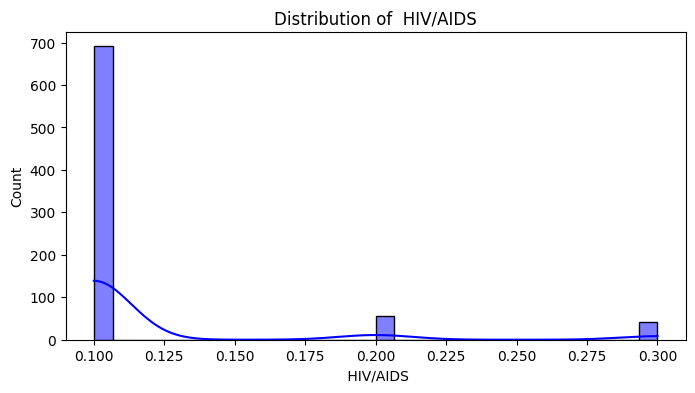

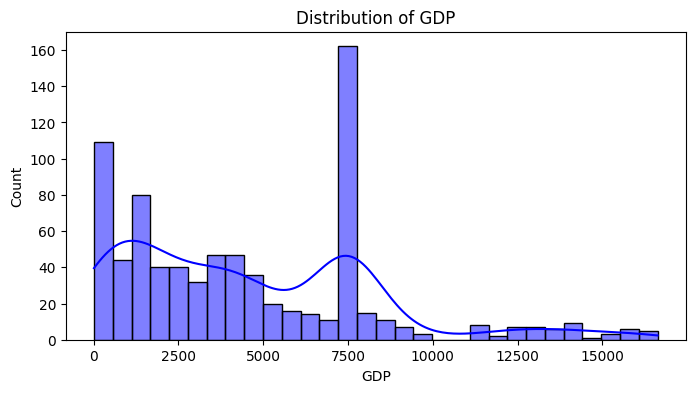

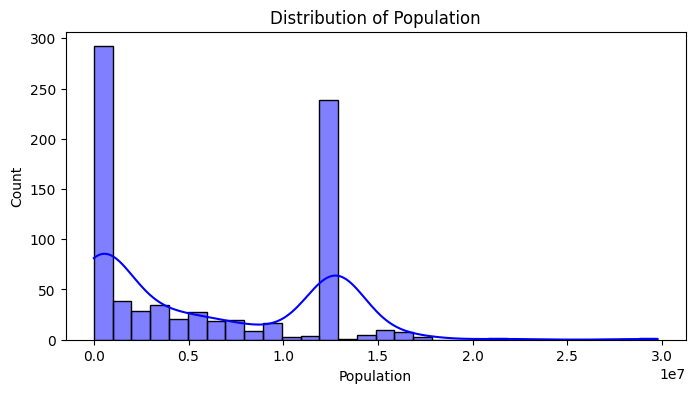

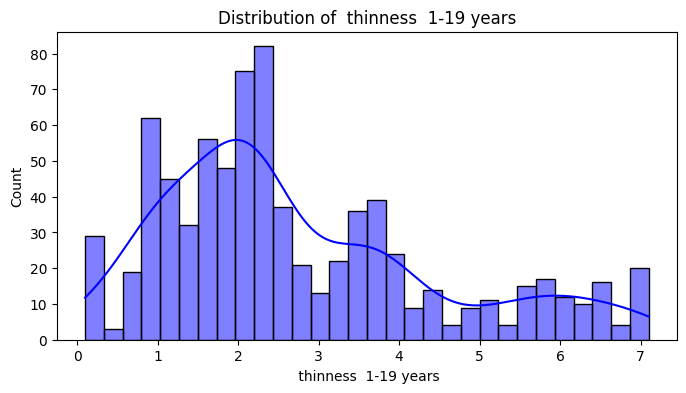

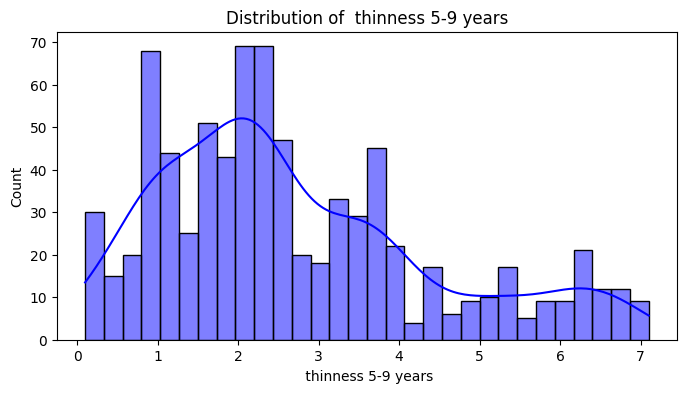

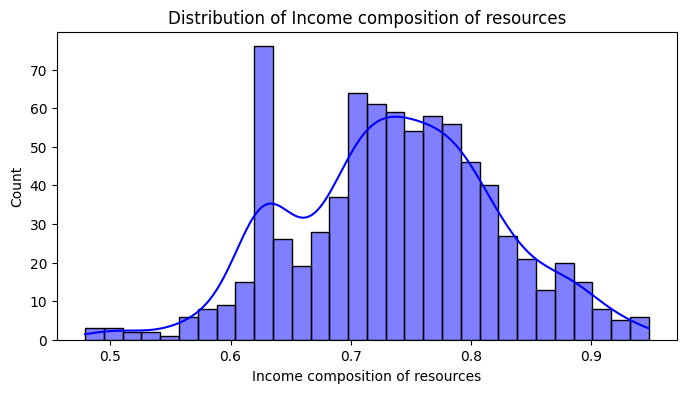

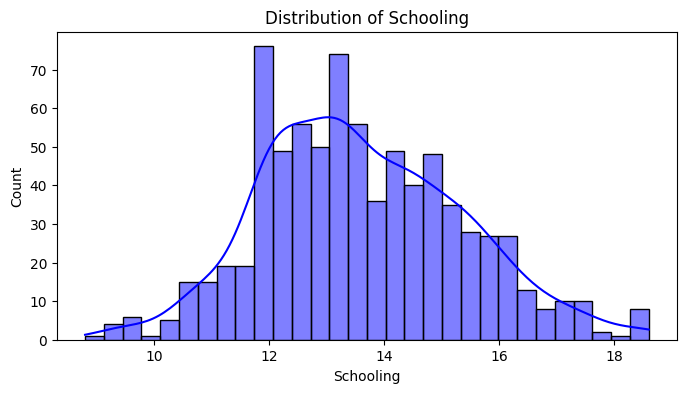

In [16]:
print("\nNumerical Feature Distributions:")
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

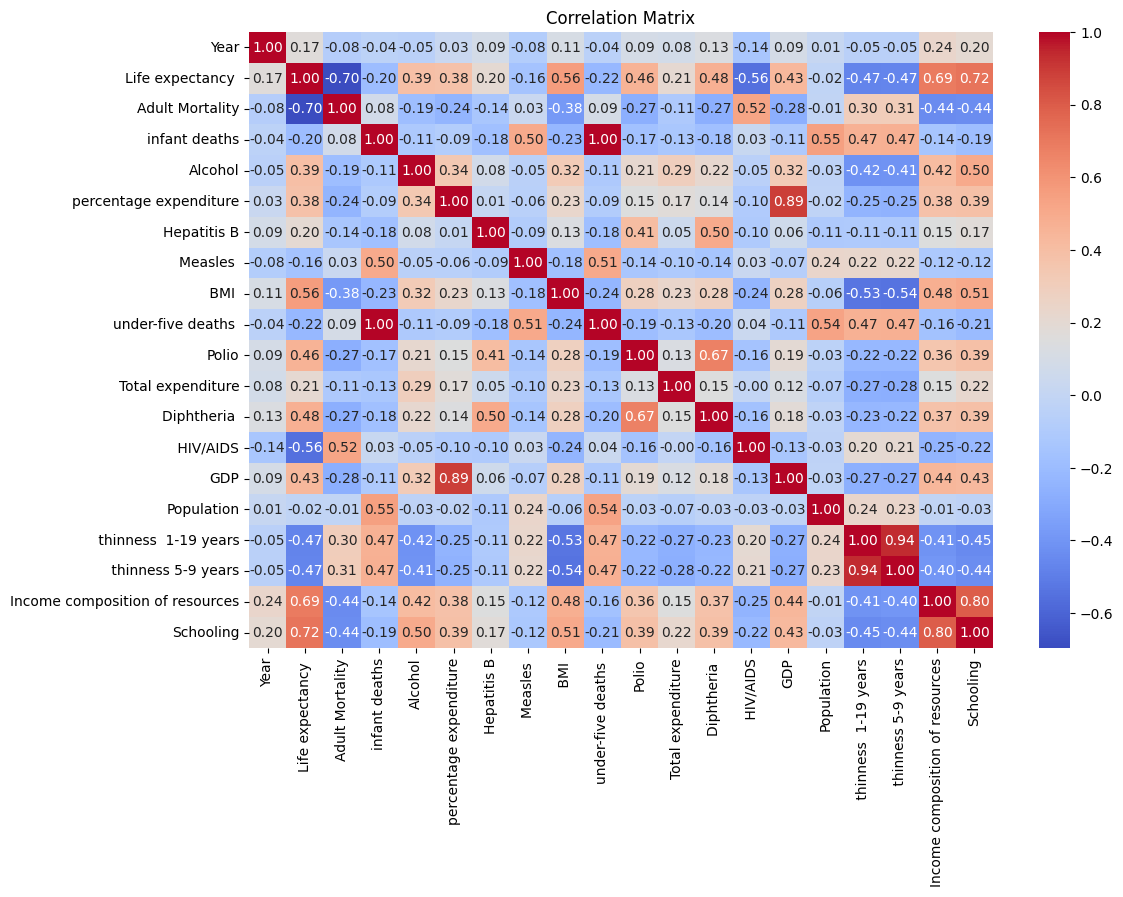

In [17]:
# Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

<ipython-input-18-1e1908c9da1a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='viridis')


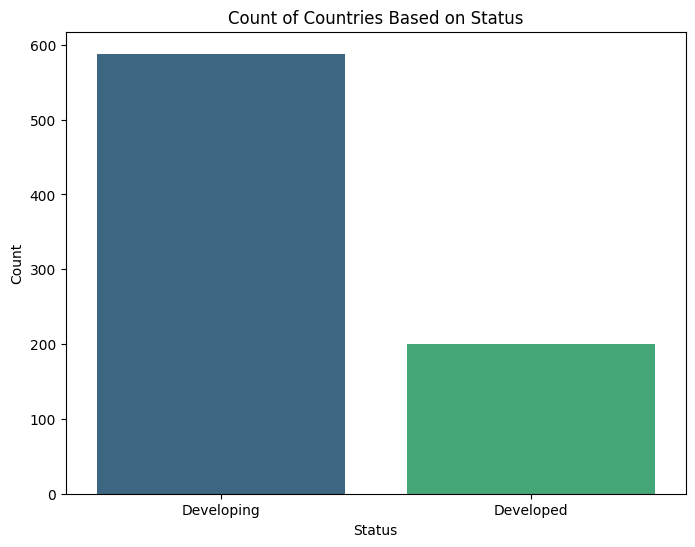

In [18]:
# Countplot for countries based on their status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status', palette='viridis')
plt.title('Count of Countries Based on Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [19]:
df.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2


In [20]:
df.Country.value_counts()

,count
Country,
Czechia,16
Tunisia,16
Jordan,16
Hungary,16
Slovakia,16
...,...
Comoros,1
Guatemala,1
Cook Islands,1


In [21]:
df.duplicated().sum()

0

In [22]:
df['Life expectancy ']

,Life expectancy
16,77.8
17,77.5
18,77.2
19,76.9
20,76.6
...,...
2858,74.1
2860,73.8
2861,73.7
2864,73.6


In [23]:
# Calculate the average life expectancy for each year
average_life_expectancy = df.groupby('Year')['Life expectancy '].mean().reset_index()

In [24]:
import plotly.express as px
# Create the interactive line plot
fig = px.line(average_life_expectancy, x='Year', y='Life expectancy ',
title='Average Life Expectancy over the Years',
labels={'Year':'Year', 'Life expectancy':'Life Expectancy (years)'
},
template='plotly_dark')
# Show the plot
fig.show()

In [25]:
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Create the interactive scatter plot
fig = px.scatter(df, x='Population', y='Life expectancy ',
hover_name='Country',
color='Status',
animation_frame='Year',
title='Population vs Life Expectancy',
labels={'Population':'Population', 'Life expectancy':'Life Expectancy (years)'},
template='plotly_dark')
# Show the plot
fig.show()

In [27]:
life_expact_status = df.groupby('Status')['Life expectancy '].mean().reset_index()
fig = px.histogram(life_expact_status, x = 'Status', y='Life expectancy ',
color='Status')
fig.update_layout(title=dict(text='<b>Average Life Expactancy for Status of Country</b>', x=0.5))
fig.show()

In [28]:
# Calculate the average life expectancy and average alcohol consumption for each year
average_data = df.groupby('Year').agg({
'Life expectancy ': 'mean',
'Alcohol': 'mean'}).reset_index()

In [29]:
# Create the interactive plot with dual y-axes
fig = go.Figure()

In [30]:
# Add life expectancy trace
fig.add_trace(go.Scatter(x=average_data['Year'],
y=average_data['Life expectancy '],
mode='lines+markers', name='Life Expectancy',
yaxis='y1'))
# Add alcohol consumption trace
fig.add_trace(go.Scatter(x=average_data['Year'],
y=average_data['Alcohol'],
mode='lines+markers', name='Alcohol Consumption',
yaxis='y2'))
# Update layout for dual y-axes
fig.update_layout(
title='Life Expectancy and Alcohol Consumption over the Years',
xaxis=dict(title='Year'),
yaxis=dict(title='Life Expectancy (years)', side='left'),
yaxis2=dict(title='Alcohol Consumption (liters)',
side='right', overlaying='y'),
template='plotly_dark')
# Show the plot
fig.show()

In [31]:
fig = px.bar(df.groupby('Status',
as_index=False).agg({'Alcohol':'mean'}), y='Alcohol',
x='Status',
title='Average Alcohol consumption of Developing and Developed Countries',
labels={'Alcohol':'Alcohol Consumption (liters per capita)', 'Life expectancy':'Life Expectancy (years)'},
template='plotly_dark')
# Show the plot
fig.show()

In [32]:
aggregated_data=df.groupby('Schooling')['Life expectancy '].mean().reset_index()
# Create the interactive line plot
fig = px.line(aggregated_data, x='Schooling', y='Life expectancy ',
title='Average Life Expectancy vs Years of Schooling',
labels={'Schooling':'Years of Schooling', 'Life expectancy':'Life Expectancy (years)'},
template='plotly_dark')
# Show the plot
fig.show()

Data Preprocessing

In [33]:
le = LabelEncoder()
cat_cols = df.select_dtypes(include = 'object').columns
for cols in cat_cols:
    df[cols] = le.fit_transform(df[cols])

In [35]:
x= df.drop(columns='Life expectancy ')
y=df['Life expectancy ']

 Feature Scaling

In [36]:
scaler=StandardScaler()
cols_to_scale=x.drop(columns='Status').columns
# for cols in cols_to_scale:
x[cols_to_scale]=scaler.fit_transform(x[cols_to_scale])

In [37]:
x.head(3)

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,-1.607889,1.479474,1,-0.634353,-0.611345,-0.309708,0.375689,0.945422,-0.404145,0.580718,...,0.853358,-0.054155,0.943546,-0.351473,-0.168051,-1.029263,-0.882355,-0.813874,0.300314,0.333542
17,-1.607889,1.261481,1,-1.612354,-0.611345,-0.331786,0.581070,0.799481,-0.404145,0.534169,...,0.649642,-0.115033,0.718943,-0.351473,-0.000218,-0.985066,-0.882355,-0.813874,0.288458,0.333542
18,-1.607889,1.043489,1,-0.486171,-0.611345,-0.270457,0.587923,0.945422,-0.404145,0.493439,...,0.853358,-0.226643,0.943546,-0.351473,-0.043704,-0.984951,-0.824173,-0.755292,0.264745,0.333542


Model Building

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [40]:
print(f"Shape of X_trainis:{x_train.shape}")
print(f"Shape of Y_trainis:{y_train.shape}")
print(f"Shape of X_testis:{x_test.shape}")
print(f"Shape of Y_testis:{y_test.shape}")

Shape of X_trainis:(630, 21)
Shape of Y_trainis:(630,)
Shape of X_testis:(158, 21)
Shape of Y_testis:(158,)


In [41]:
models = {
'Random Forest': RandomForestRegressor(random_state=42),
'Extra Trees Regressor':ExtraTreesRegressor(random_state=42),
'GradientBoost Regressor':GradientBoostingRegressor(random_state=42),
'XGB Regressor': XGBRegressor()
 }

In [42]:
# list to store results
results = []

In [44]:
# Train and evaluate each model
for model_name, model in models.items():
# Train the model
    model.fit(x_train, y_train)
# Make predictions
    y_pred = model.predict(x_test)
# Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
# Store results in list
    results.append({'Model': model_name, 'RMSE': rmse, 'R2 Score': r2})

In [45]:
results_df = pd.DataFrame(results)

In [46]:
results_df=results_df.sort_values("R2 Score", ascending =False)
results_df

,Model,RMSE,R2 Score
1,Extra Trees Regressor,1.260862,0.885641
0,Random Forest,1.387394,0.861536
3,XGB Regressor,1.534944,0.830519
2,GradientBoost Regressor,1.543683,0.828584


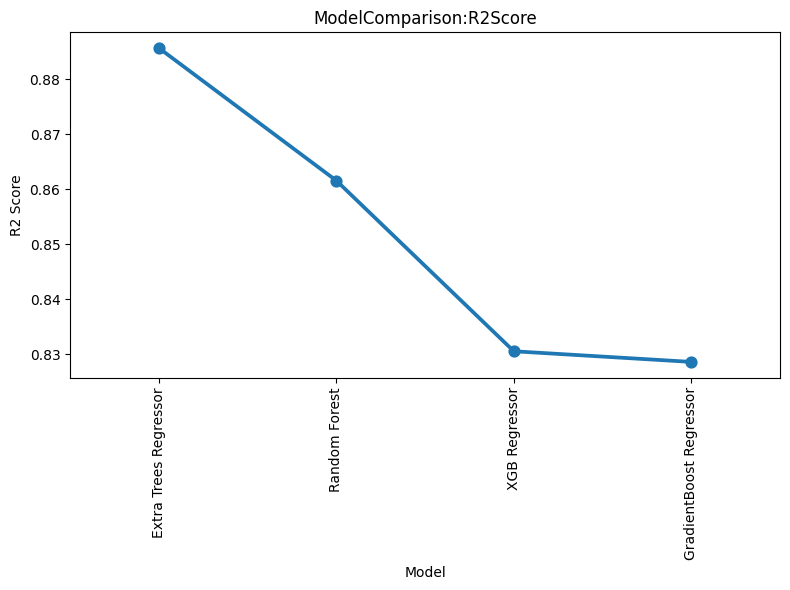

In [48]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='R2 Score',data=results_df)
plt.xticks(rotation=90)
plt.title('ModelComparison:R2Score')
plt.tight_layout()
plt.show()

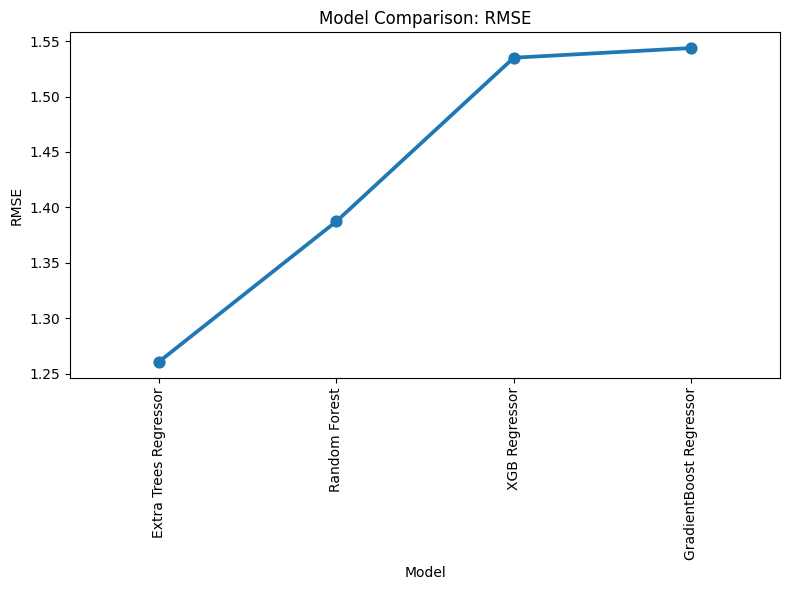

In [49]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='RMSE',data=results_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()

In [50]:
from sklearn.model_selection import cross_val_score, KFold
best_model = ExtraTreesRegressor()
kf = KFold(n_splits=20, shuffle=True, random_state=42)
cross_val = cross_val_score(best_model, x, y, cv= kf,scoring='r2')
cross_val

array([0.84051074, 0.96805048, 0.9048753 , 0.89015141, 0.96326251,
       0.97065263, 0.91899366, 0.8518378 , 0.80869267, 0.91516949,
       0.86502731, 0.82103718, 0.88301549, 0.84897331, 0.92135564,
       0.95339081, 0.83471784, 0.87712479, 0.882583  , 0.95790342])

Text(0.5, 1.0, 'Cross Validation scores')

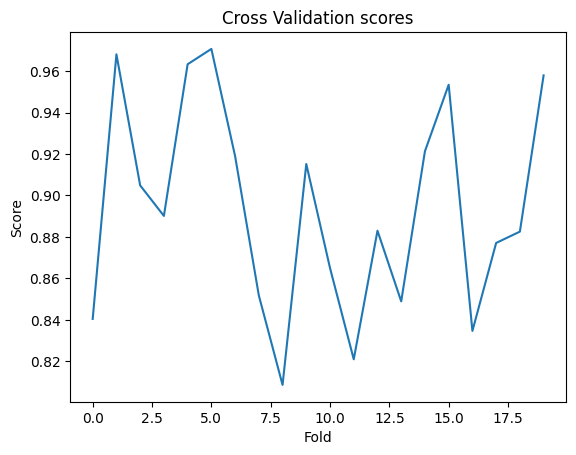

In [51]:
plt.plot(cross_val)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title("Cross Validation scores")

In [52]:
cross_val.mean()

0.8938662728829087

In [53]:
cross_val.std()

0.04993888125471258